In [1]:
import plotIq
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
manuscript_path = "/home/phc/repository_local/latex/saxs-tem/figs-tikz/"
#manuscript_path = ""
data_path  = "/home/phc/repository_local/FFT-from-image-compute-radial-intensity/src/resultsPaper/"

Figure 1 (TEM images):

In [2]:
xbox = 0.02
ybox = 0.03
boxfontsize = 27
boxprops = dict(boxstyle='round', facecolor='white', alpha=1.0)
dpi=80

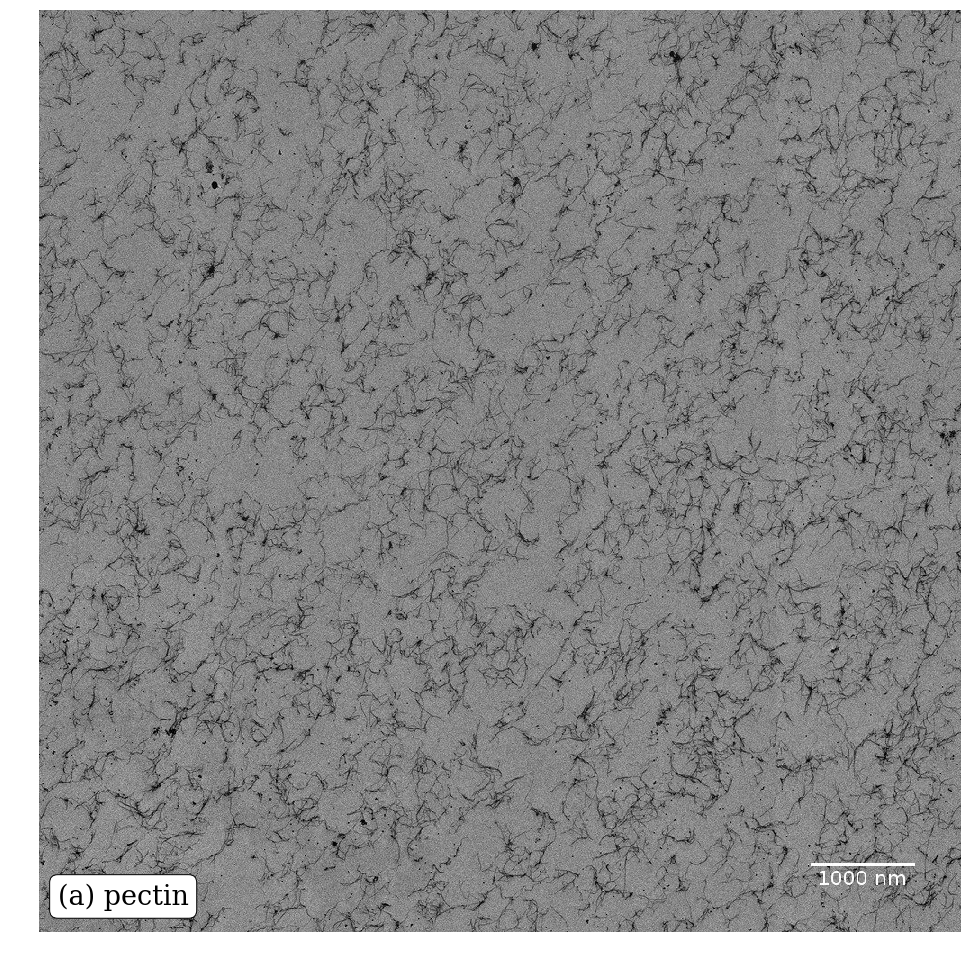

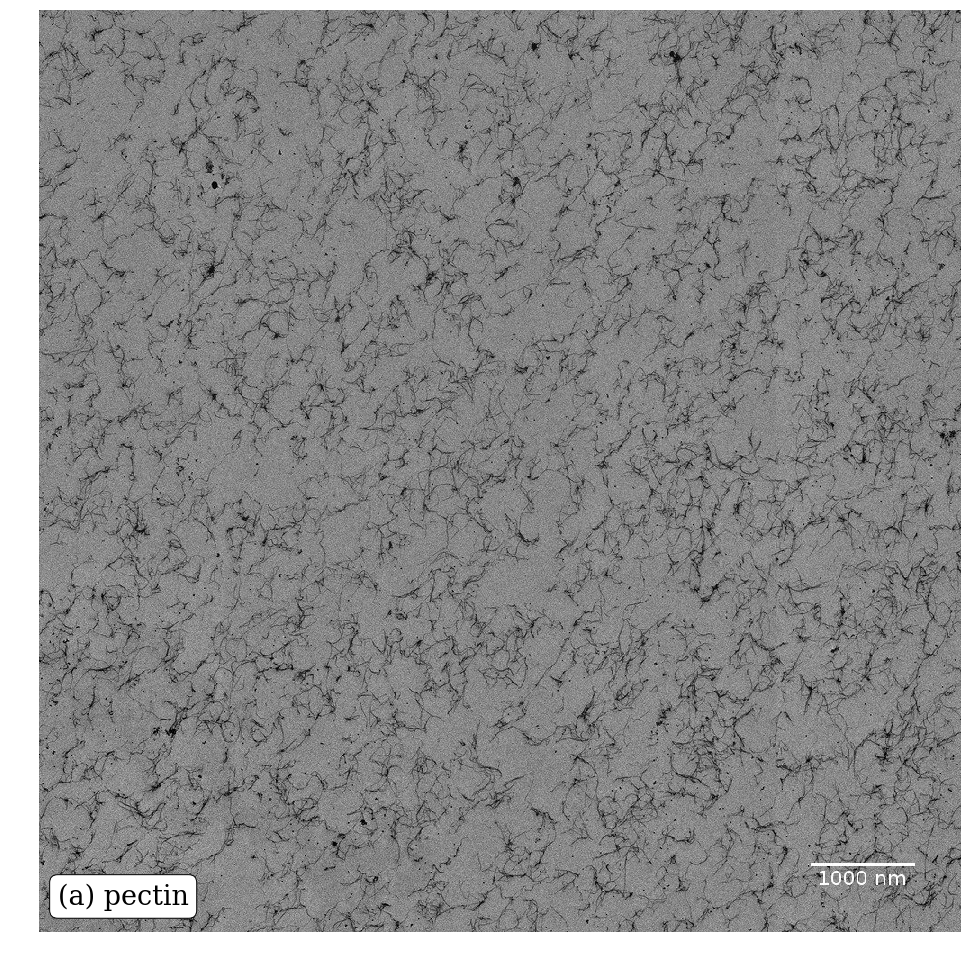

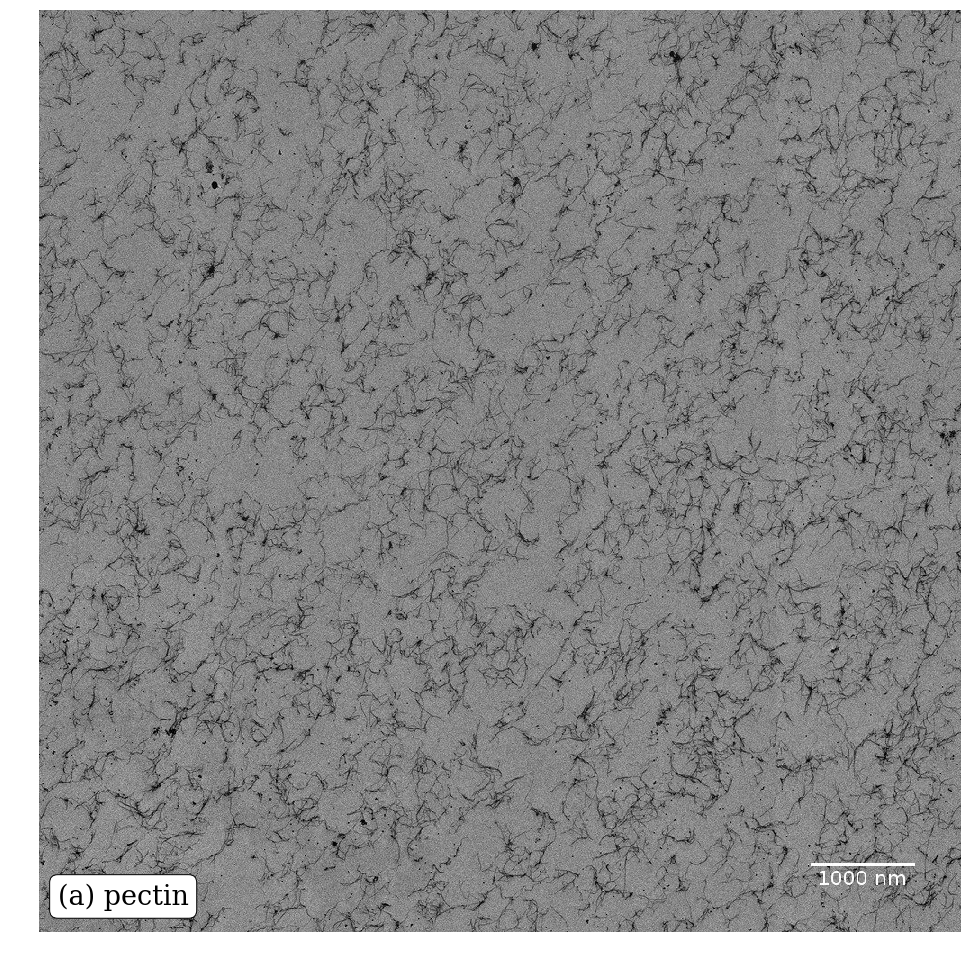

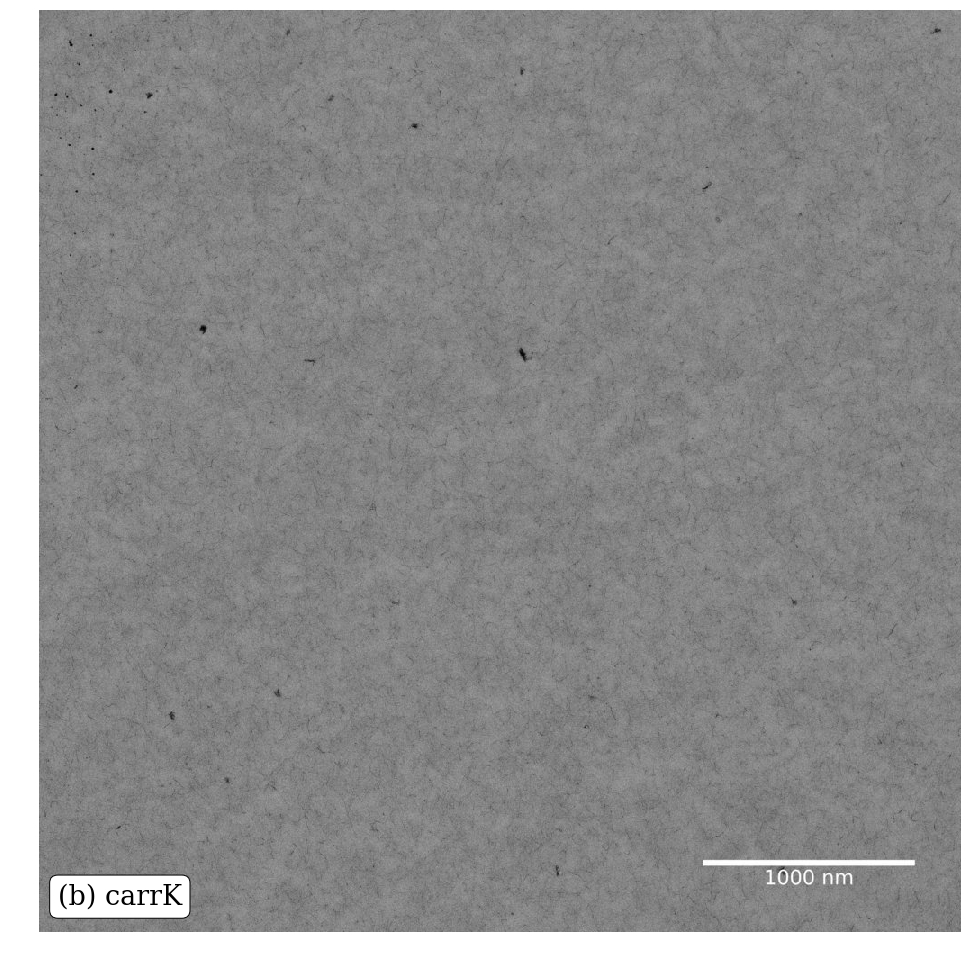

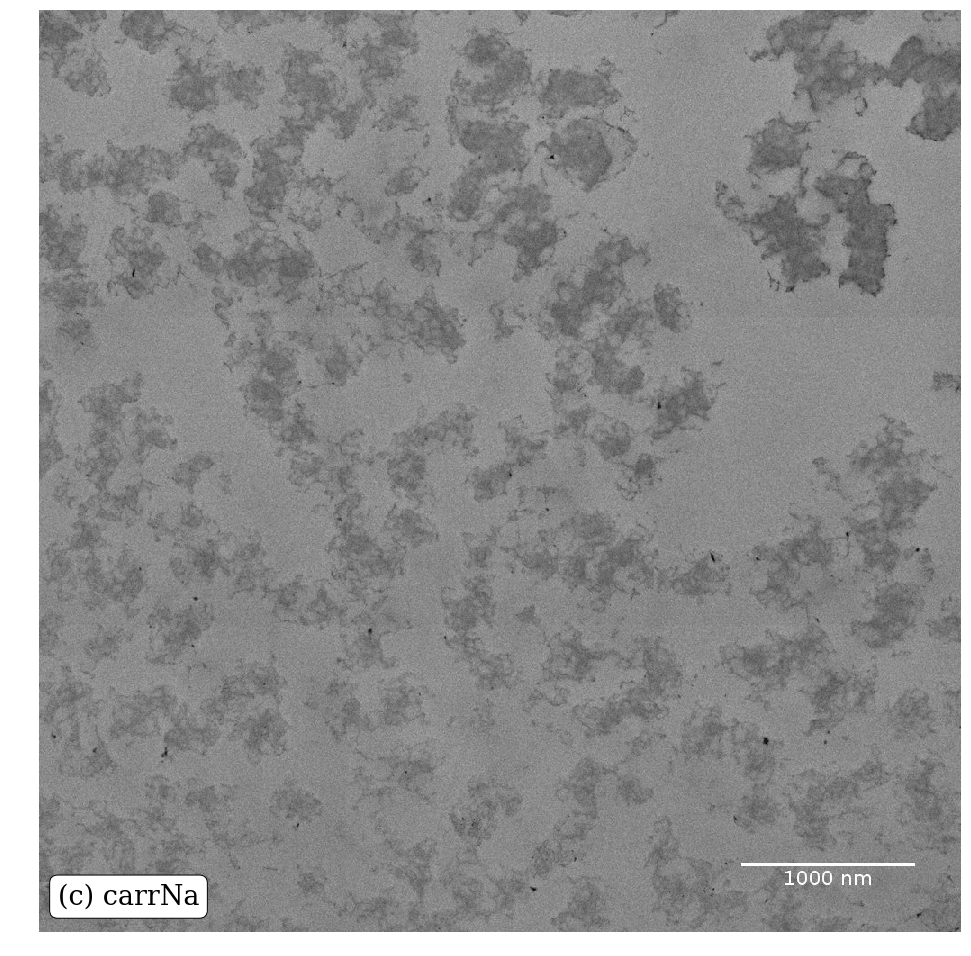

In [5]:
images_path = os.path.join(manuscript_path, "../images/")

image_file = os.path.join(images_path, "pectin1_1045_homogeneous_scalebar.jpeg")
image_data = mpimg.imread(image_file)
height, width = image_data.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(image_data, cmap="gray", interpolation='none')
fig.text(xbox, ybox , '(a) pectin', fontsize=boxfontsize, family='serif', bbox=boxprops)
fig.savefig(os.path.join(images_path, "pectin1_1045_homogeneous_scalebar_label.jpeg"), dpi=dpi)


#image_file = os.path.join(images_path, "carrageenan_K_Montage_832_scalebarFixed.jpeg")
image_file = os.path.join(images_path, "carrageenan_K_Montage_833_scalebarFixed.png")
image_data = mpimg.imread(image_file)
height, width = image_data.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(image_data, cmap="gray", interpolation='none')
fig.text(xbox, ybox , '(b) carrK', fontsize=boxfontsize, family='serif', bbox=boxprops)
#fig.savefig(os.path.join(images_path, "carrageenan_K_Montage_832_scalebarFixed_label.jpeg"), dpi=dpi)
fig.savefig(os.path.join(images_path, "carrageenan_K_Montage_833_scalebarFixed_label.jpeg"), dpi=dpi)


image_file = os.path.join(images_path, "carrageenan_Na_Montage_851_scalebar.jpeg")
image_data = mpimg.imread(image_file)
height, width = image_data.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(image_data, cmap="gray", interpolation='none')
fig.text(xbox, ybox , '(c) carrNa', fontsize=boxfontsize, family='serif', bbox=boxprops)
fig.savefig(os.path.join(images_path, "carrageenan_Na_Montage_851_scalebar_label.jpeg"), dpi=dpi)
plt.show()

Get the SAXS data.

If 'merged', the R script mergeSAXSdata.R has been used to merge long and short q ranges.

In [ ]:
carK_saxs_file = os.path.join(data_path, "saxs/Carragenan_K_1car30KCl10A_merged.dat")
carNa_saxs_file = os.path.join(data_path,"saxs/Carragenan_Na_1car300NaCl10A_merged.dat")
pectin_saxs_file = os.path.join(data_path,"saxs/Pectin1Acid_1car200NaCl10A_merged.dat")

carK_saxs_data = plotIq.parse_saxs_data(input_file=carK_saxs_file)
carNa_saxs_data = plotIq.parse_saxs_data(input_file=carNa_saxs_file)
pectin_saxs_data = plotIq.parse_saxs_data(input_file=pectin_saxs_file)

# Transform q from A^-1 to nm^-1
carK_saxs_data['q'] = carK_saxs_data['q'] * 10
carNa_saxs_data['q'] = carNa_saxs_data['q'] * 10
pectin_saxs_data['q'] = pectin_saxs_data['q'] * 10

Get the Radial Intensity analysis of the original TEM images.

Original images are named:

carK: Montage_832.tif

carNa: Montage_851.tif

pectin (acid) : pectin1_1045_homogeneous.tif

These images are analyzed using the executable SAXS_tem_functional (c++): https://github.com/phcerdan/FFTRadialIntenstiy to generate a data file with q (radius in the freq domain) versus I (average radial intensity). 

In [ ]:
carK_original_file = os.path.join(data_path, "tem/carK_Montage_833.plot")
carNa_original_file = os.path.join(data_path, "tem/carNa_Montage_851.plot")
pectin_original_file = os.path.join(data_path, "tem/pectin1_Montage_1045.plot")

#carK_original_file_SAXSsimClass = "../../resultsPaper/SAXSsimClass/carrageenanK832.plot"
#carNa_original_file_SAXSsimClass = "../../resultsPaper/SAXSsimClass/carrageenanNa851.plot"
#pectin_original_file_SAXSsimClass = "../../resultsPaper/SAXSsimClass/pectinAcid.plot"

carK_original_data_unscaled = plotIq.parse_data(input_file=carK_original_file)
carNa_original_data_unscaled = plotIq.parse_data(input_file=carNa_original_file)
pectin_original_data_unscaled = plotIq.parse_data(input_file=pectin_original_file)

In [ ]:
nm_per_pixel = 0.86
I_multiplier = 10**-7

Trim noisy data at the extremes:

Scale q in the image, taking into acount pixel resolution of microscopy images.

In [ ]:
# SAXS: Use pectin acid last q-value as the cutoff
q_saxscutoff_right = pectin_saxs_data['q'].iloc[-1] * 0.75
print("q_saxscutoff_right:",q_saxscutoff_right)
q_saxscutoff_left = 0.01 * 2
q_saxscutoff_left = 0.0
print("q_saxscutoff_left:", q_saxscutoff_left)
carK_saxs_data = carK_saxs_data.query('@q_saxscutoff_left <= q <= @q_saxscutoff_right')
carNa_saxs_data = carNa_saxs_data.query('@q_saxscutoff_left <= q <= @q_saxscutoff_right')
pectin_saxs_data = pectin_saxs_data.query('@q_saxscutoff_left <= q <= @q_saxscutoff_right')

In [ ]:
# TEM: cut off low q's
q_temcutoff_left = 7 * 10**-3
print("q_temcutoff_left:",q_temcutoff_left)

Plotting:

In [ ]:
opt_params = {'legend.loc': 'upper right'}
plotIq.plot_params(opt_params)
tem_color = 'C0'
saxs_color = 'C1'
denoise1_color = 'C2'
denoise2_color = 'C8'

xbox = 0.15
ybox = 0.205
boxfontsize = 15
boxprops = dict(boxstyle='round', facecolor='white', alpha=1.0)

Select a cutoff to differentiate low and high q regions where there is agreement.

In [ ]:
qcutoff = 5 * 0.01

In [ ]:
carK_original_data = plotIq.scale_data(carK_original_data_unscaled, nm_per_pixel, I_multiplier * 10**-0.85)
valid_qrange = carK_original_data['q'] >= q_temcutoff_left
carK_original_data = carK_original_data[valid_qrange]
fig_carK, ax_carK = plotIq.plt.subplots(1,1)

ax_carK = plotIq.plot_data(carK_original_data, axes=ax_carK )
ax_carK = plotIq.plot_data(carK_saxs_data, axes=ax_carK)
plotIq.plot_vline(qcutoff, carK_saxs_data, ax_carK)
tem_line = ax_carK.lines[0]
tem_line.set_color(tem_color)
saxs_line = ax_carK.lines[1]
saxs_line.set_color(saxs_color)
ax_carK.legend(ax_carK.lines, ['TEM', 'SAXS'])
fig_carK.text(0, 0.84 , '(b)', fontsize=16, family='serif')
fig_carK.text(xbox, ybox , '(b) carrK', fontsize=boxfontsize, family='serif', bbox=boxprops)

#plotIq.plt.show()

carNa_original_data = plotIq.scale_data(carNa_original_data_unscaled, nm_per_pixel, I_multiplier * 10**-0.7)
valid_qrange = carNa_original_data['q'] >= q_temcutoff_left
carNa_original_data = carNa_original_data[valid_qrange]

fig_carNa, ax_carNa = plotIq.plt.subplots(1,1)
ax_carNa = plotIq.plot_data(carNa_original_data, axes=ax_carNa )
ax_carNa = plotIq.plot_data(carNa_saxs_data, axes=ax_carNa)
plotIq.plot_vline(qcutoff, carNa_saxs_data, ax_carNa)
tem_line = ax_carNa.lines[0]
tem_line.set_color(tem_color)
saxs_line = ax_carNa.lines[1]
saxs_line.set_color(saxs_color)
ax_carNa.legend(ax_carNa.lines, ['TEM', 'SAXS'])
fig_carNa.text(0.01, 0.84 , '(c)', fontsize=16, family='serif')
fig_carNa.text(xbox, ybox , '(c) carrNa', fontsize=boxfontsize, family='serif', bbox=boxprops)

#plotIq.plt.show()

pectin_original_data = plotIq.scale_data(pectin_original_data_unscaled, nm_per_pixel, I_multiplier * 10**-4.5)
valid_qrange = pectin_original_data['q'] >= q_temcutoff_left
pectin_original_data = pectin_original_data[valid_qrange]
fig_pectin, ax_pectin = plotIq.plt.subplots(1,1)
ax_pectin = plotIq.plot_data(pectin_original_data, axes=ax_pectin )
ax_pectin = plotIq.plot_data(pectin_saxs_data, axes=ax_pectin )
plotIq.plot_vline(qcutoff, pectin_saxs_data, ax_pectin)
tem_line = ax_pectin.lines[0]
tem_line.set_color(tem_color)
saxs_line = ax_pectin.lines[1]
saxs_line.set_color(saxs_color)
ax_pectin.legend(ax_pectin.lines, ['TEM', 'SAXS'])
fig_pectin.text(0.0001, 0.84 , '(a)', fontsize=16, family='serif')
fig_pectin.text(xbox, ybox , '(a) pectin', fontsize=boxfontsize, family='serif', bbox=boxprops)

plotIq.plt.show()

Save figures to pdf: (Figure 2 -saxs-tem-comparisson)

In [ ]:
fig_carK.subplots_adjust(bottom=0.155)
fig_carK.savefig(os.path.join(manuscript_path, "saxs-tem-carK.pdf"))
fig_carNa.subplots_adjust(bottom=0.155)
fig_carNa.savefig(os.path.join(manuscript_path,"saxs-tem-carNa.pdf"))
fig_pectin.subplots_adjust(bottom=0.155)
fig_pectin.savefig(os.path.join(manuscript_path,"saxs-tem-pectin.pdf"))

Analyze denoised image:

With wavelets:

using blsgsm (based on Portilla 2003 algorithm). (TODO: link here/cite properly)

single_sigma ="05"
pectin_gsm_sigma05_file = "/home/phc/repository_local/wavelet_held/blsgsm_v1.0/output_saxstem/inputs/pectin/pectin_sigma"+single_sigma+".plot"

pectin_gsm_sigma05_data = plotIq.parse_data(input_file=pectin_gsm_sigma05_file)

pectin_gsm_sigma05_data = plotIq.scale_data(pectin_gsm_sigma05_data, nm_per_pixel, I_multiplier * 10**-5)

fig_pectin_gsm, ax_pectin_gsm = plotIq.plt.subplots(1,1)
ax_pectin_gsm = plotIq.plot_data(pectin_gsm_sigma05_data, axes=ax_pectin_gsm )
ax_pectin_gsm = plotIq.plot_data(pectin_original_data, axes=ax_pectin_gsm )
plotIq.plot_vline(qcutoff, pectin_original_data, ax_pectin_gsm)
tem_line = ax_pectin_gsm.lines[0]
tem_line.set_color(tem_color)
saxs_line = ax_pectin_gsm.lines[1]
saxs_line.set_color(saxs_color)
ax_pectin_gsm.legend(ax_pectin_gsm.lines, [single_sigma, 'TEM'])
plotIq.plt.show()

In [ ]:
import glob
pectin_gsm_basename = "/home/phc/repository_local/wavelet_held/blsgsm_v1.0/output_saxstem/inputs/pectin/pectin_sigma*.plot"
pectin_gsm_files = sorted(glob.glob(pectin_gsm_basename))
pectin_gsm_files =[
    "/home/phc/repository_local/wavelet_held/blsgsm_v1.0/output_saxstem/inputs/pectin/pectin_sigma05.plot",
#    "/home/phc/repository_local/wavelet_held/blsgsm_v1.0/output_saxstem/inputs/pectin/pectin_sigma10.plot",
#    "/home/phc/repository_local/wavelet_held/blsgsm_v1.0/output_saxstem/inputs/pectin/pectin_sigma50.plot"
]
print("\n".join(pectin_gsm_files))
# Grab the sigma digit from the file using regex. This changes depend on the file name we use.
import re
number_regex = "(\d*\.\d+|\d+)"
p = re.compile("sigma"+number_regex)
q_zoom = 0.01 # choose any negative number to no zoom at all.
fig_pectin_gsm, ax_pectin_gsm = plotIq.plt.subplots(1,1)
#ax_pectin_gsm = plotIq.plot_data(pectin_original_data, axes=ax_pectin_gsm, label='TEM')
ax_pectin_gsm = plotIq.plot_data(pectin_original_data.loc[pectin_original_data["q"]>=q_zoom], axes=ax_pectin_gsm, label='TEM')
ax_pectin_gsm = plotIq.plot_data(pectin_saxs_data.loc[pectin_saxs_data["q"]>=q_zoom], axes=ax_pectin_gsm, label='SAXS')
for file in pectin_gsm_files:
    file_data = plotIq.parse_data(input_file=file)
    file_data = plotIq.scale_data(file_data, nm_per_pixel, I_multiplier * 10**-5)
    sigma = p.search(file).groups(0)[0]
    ax_pectin_gsm = plotIq.plot_data(file_data.loc[file_data["q"]>=q_zoom], axes=ax_pectin_gsm, label="WL S" + sigma[0] + "." + sigma[1:] )
    
all_lines = ax_pectin_gsm.lines
fig_pectin_gsm.text(xbox, ybox , '(a) pectin', fontsize=boxfontsize, family='serif', bbox=boxprops)
plotIq.plt.legend()
plotIq.plt.show()

With TotalVariation methods:

using proxTV: https://github.com/albarji/proxTV (TV1_2D)

In [ ]:
pectin_tv_files =[
    "/home/phc/repository_local/total_variation/demo_saxstem/results/pectin1_Montage_1045_TV2DL1_lam005.plot",
    "/home/phc/repository_local/total_variation/demo_saxstem/results/pectin1_Montage_1045_negated_TV2DL1_lam015.plot"
]
I_multiplier_files =[
    10**0.318,
    10**-9.3
]
#pectin_tv_file = "/home/phc/repository_local/total_variation/demo_saxstem/results/pectin1_Montage_1045_negated_TV2DL1_lam015.plot"
#pectin_tv_file = "/home/phc/repository_local/total_variation/demo_saxstem/results/pectin1_Montage_1045_TV2DL1_lam005.plot"
#pectin_tv_data_o = plotIq.parse_data(input_file=pectin_tv_file)
#pectin_tv_data = plotIq.scale_data(pectin_tv_data_o, nm_per_pixel, I_multiplier)
#pectin_tv_data = pectin_tv_data.query('@q_temcutoff_left <= q')
fig_pectin_TV, ax_pectin_TV = plotIq.plt.subplots(1,1)
ax_pectin_TV = plotIq.plot_data(pectin_original_data, axes=ax_pectin_TV,label='TEM')
ax_pectin_TV = plotIq.plot_data(pectin_saxs_data, axes=ax_pectin_TV, label='SAXS' )
#ax_pectin_TV = plotIq.plot_data(pectin_tv_data, axes=ax_pectin_TV )
#plotIq.plot_vline(qcutoff, pectin_original_data, ax_pectin_TV)
number_regex = "(\d*\.\d+|\d+)"
p = re.compile("lam"+number_regex)
for idx, file in enumerate(pectin_tv_files):
    file_data = plotIq.parse_data(input_file=file)
    file_data = plotIq.scale_data(file_data, nm_per_pixel, I_multiplier * 10**-0.5 * I_multiplier_files[idx])
    lam = p.search(file).groups(0)[0]
    ax_pectin_TV = plotIq.plot_data(file_data.query('@q_temcutoff_left <= q'), axes=ax_pectin_TV, label="TV-L" + lam[0] + "." + lam[1:] )
    


tem_line = ax_pectin_TV.lines[0]
tem_line.set_color(tem_color)
saxs_line = ax_pectin_TV.lines[1]
saxs_line.set_color(saxs_color)
TV_line1 = ax_pectin_TV.lines[2]
TV_line1.set_color(denoise1_color)
TV_line2 = ax_pectin_TV.lines[3]
TV_line2.set_color(denoise2_color)
ax_pectin_TV.legend(ax_pectin_TV.lines, ['TEM', 'SAXS', 'TV-L0.05', 'TV-L0.15'])
fig_pectin_TV.text(xbox, ybox , '(a) pectin', fontsize=boxfontsize, family='serif', bbox=boxprops)
#plotIq.plt.legend()
plotIq.plt.show()


In [ ]:
carK_tv_file = "/home/phc/repository_local/total_variation/demo_saxstem/results/carK_Montage832_TV1_lam005.plot"
carK_tv_data_o = plotIq.parse_data(input_file=carK_tv_file)
carK_tv_data = plotIq.scale_data(carK_tv_data_o, nm_per_pixel, I_multiplier * 10**-5.22)
carK_tv_data = carK_tv_data.query('@q_temcutoff_left <= q')
fig_carK_TV, ax_carK_TV = plotIq.plt.subplots(1,1)
ax_carK_TV = plotIq.plot_data(carK_original_data, axes=ax_carK_TV )
ax_carK_TV = plotIq.plot_data(carK_saxs_data, axes=ax_carK_TV )
ax_carK_TV = plotIq.plot_data(carK_tv_data, axes=ax_carK_TV )
plotIq.plot_vline(qcutoff, carK_original_data, ax_carK_TV)
tem_line = ax_carK_TV.lines[0]
tem_line.set_color(tem_color)
saxs_line = ax_carK_TV.lines[1]
saxs_line.set_color(saxs_color)
TV_line = ax_carK_TV.lines[2]
ax_carK_TV.legend(ax_carK_TV.lines, ['TEM', 'SAXS', 'TV-L0.05'])
fig_carK_TV.text(xbox, ybox , '(b) carrK', fontsize=boxfontsize, family='serif', bbox=boxprops)
plotIq.plt.show()

In [ ]:
carNa_tv_file = "/home/phc/repository_local/total_variation/demo_saxstem/results/carNa_Montage851_TV1_lam005.plot"
carNa_tv_data_o = plotIq.parse_data(input_file=carNa_tv_file)
carNa_tv_data = plotIq.scale_data(carNa_tv_data_o, nm_per_pixel, I_multiplier * 10**-5.49)
carNa_tv_data = carNa_tv_data.query('@q_temcutoff_left <= q')
fig_carNa_TV, ax_carNa_TV = plotIq.plt.subplots(1,1)
ax_carNa_TV = plotIq.plot_data(carNa_original_data, axes=ax_carNa_TV )
ax_carNa_TV = plotIq.plot_data(carNa_saxs_data, axes=ax_carNa_TV )
ax_carNa_TV = plotIq.plot_data(carNa_tv_data, axes=ax_carNa_TV )
plotIq.plot_vline(qcutoff, carNa_original_data, ax_carNa_TV)
tem_line = ax_carNa_TV.lines[0]
tem_line.set_color(tem_color)
saxs_line = ax_carNa_TV.lines[1]
saxs_line.set_color(saxs_color)
TV_line = ax_carNa_TV.lines[2]
ax_carNa_TV.legend(ax_carNa_TV.lines, ['TEM', 'SAXS', 'TV-L0.05'])
fig_carNa_TV.text(xbox, ybox , '(c) carrNa', fontsize=boxfontsize, family='serif', bbox=boxprops)
plotIq.plt.show()

Save figures to pdf: (Figure 3 -denoise effects-)

In [ ]:
fig_carK_TV.subplots_adjust(bottom=0.155)
fig_carK_TV.savefig(os.path.join(manuscript_path, "saxs-tem-TV-carK.pdf"))
fig_carK_TV.savefig(os.path.join(manuscript_path, "saxs-tem-TV-carK.svg"), format="svg")
fig_carNa_TV.subplots_adjust(bottom=0.155)
fig_carNa_TV.savefig(os.path.join(manuscript_path,"saxs-tem-TV-carNa.pdf"))
fig_carNa_TV.savefig(os.path.join(manuscript_path,"saxs-tem-TV-carNa.svg"), format="svg")
fig_pectin_TV.subplots_adjust(bottom=0.155)
fig_pectin_TV.savefig(os.path.join(manuscript_path,"saxs-tem-TV-pectin.pdf"))
fig_pectin_TV.savefig(os.path.join(manuscript_path,"saxs-tem-TV-pectin.svg"), format="svg")